In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
fmu = r.TFile("./data/MuonCount_Energies_1700_3500_May22.root")

In [6]:
fmu.ls()
cmu = fmu.Get("c1_n3")
print([c for c in cmu.GetListOfPrimitives()])
hmu = cmu.GetPrimitive("muCountHist").Clone("hmu")

[<ROOT.TH3D object ("muCountHist") at 0x7fffdcdbbc60>, <ROOT.TPaveText object ("title") at 0x7fffdceba6f0>]
TFile**		./data/MuonCount_Energies_1700_3500_May22.root	
 TFile*		./data/MuonCount_Energies_1700_3500_May22.root	
  KEY: TCanvas	c1_n3;1	c1_n3


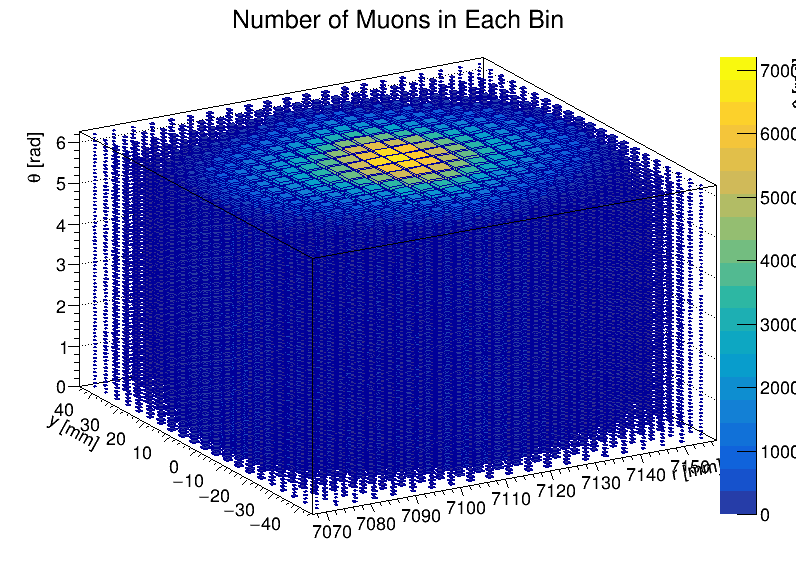

In [7]:
c = r.TCanvas("c","c",800,600)
hmu.Draw("lego2z")
c.Draw()

In [8]:
histVec_ry = []
histVec_r = []
histVec_y = []

he_allCalos = hmu.Clone("he_allCalos")
he_allCalos.Reset()
he_allCalos.SetTitle("Number of Positrons From Each Bin in All Calorimeters")

for calo in range(1,25):
    print("Starting Calo:", calo)
    fi = r.TFile("./data/PDF_MuonUnscaled_Energies_1700_3500_Calo"+str(calo)+"_May22.root")
    #fi.ls()
    ci = fi.Get("c")
    #print([c for c in ci.GetListOfPrimitives()])
    hi = ci.GetPrimitive("PDF_AllEnergies").Clone("hi")
    he_allCalos.Add(hi)

Starting Calo: 1
Starting Calo: 2
Starting Calo: 3
Starting Calo: 4
Starting Calo: 5
Starting Calo: 6
Starting Calo: 7
Starting Calo: 8
Starting Calo: 9
Starting Calo: 10
Starting Calo: 11
Starting Calo: 12
Starting Calo: 13
Starting Calo: 14
Starting Calo: 15
Starting Calo: 16
Starting Calo: 17
Starting Calo: 18
Starting Calo: 19
Starting Calo: 20
Starting Calo: 21
Starting Calo: 22
Starting Calo: 23
Starting Calo: 24


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


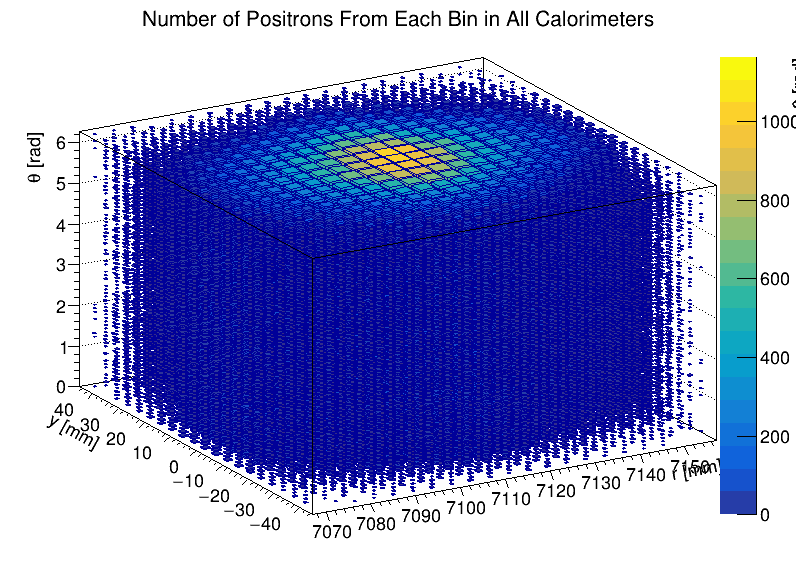

In [9]:
c = r.TCanvas("c","c",800,600)
he_allCalos.Draw("lego2z")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


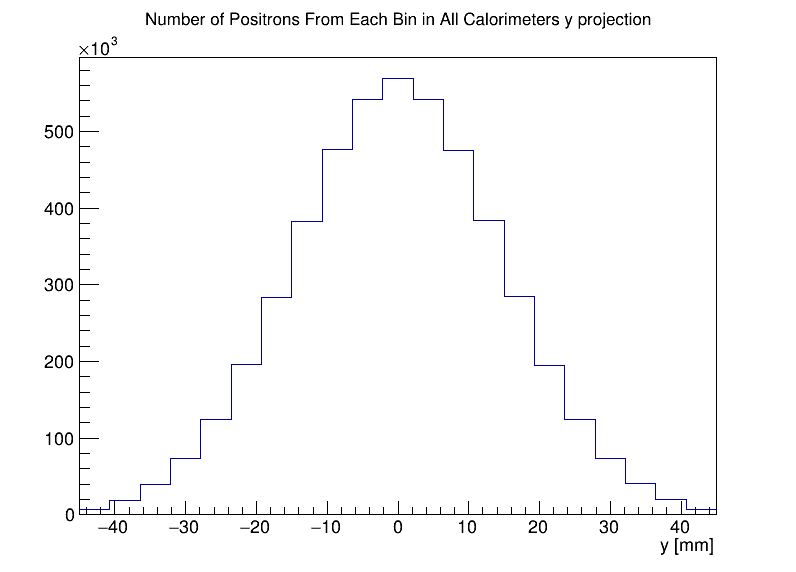

In [10]:
c = r.TCanvas("c","c",800,600)
he_y = he_allCalos.Project3D("y").Clone()
he_y.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


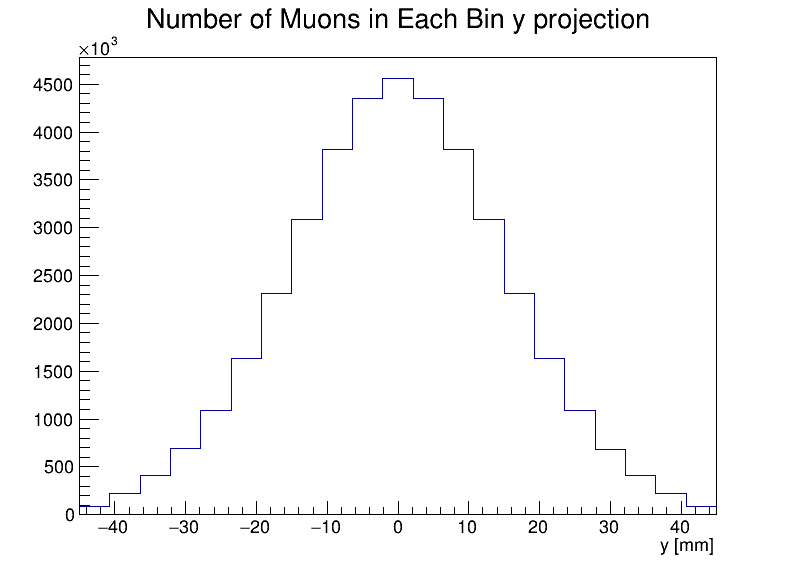

In [11]:
c = r.TCanvas("c","c",800,600)
hmu_y = hmu.Project3D("y").Clone()
hmu_y.Draw()
c.Draw()

In [12]:
he_y_acceptance = he_y.Clone()
he_y_acceptance.Divide(hmu_y)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


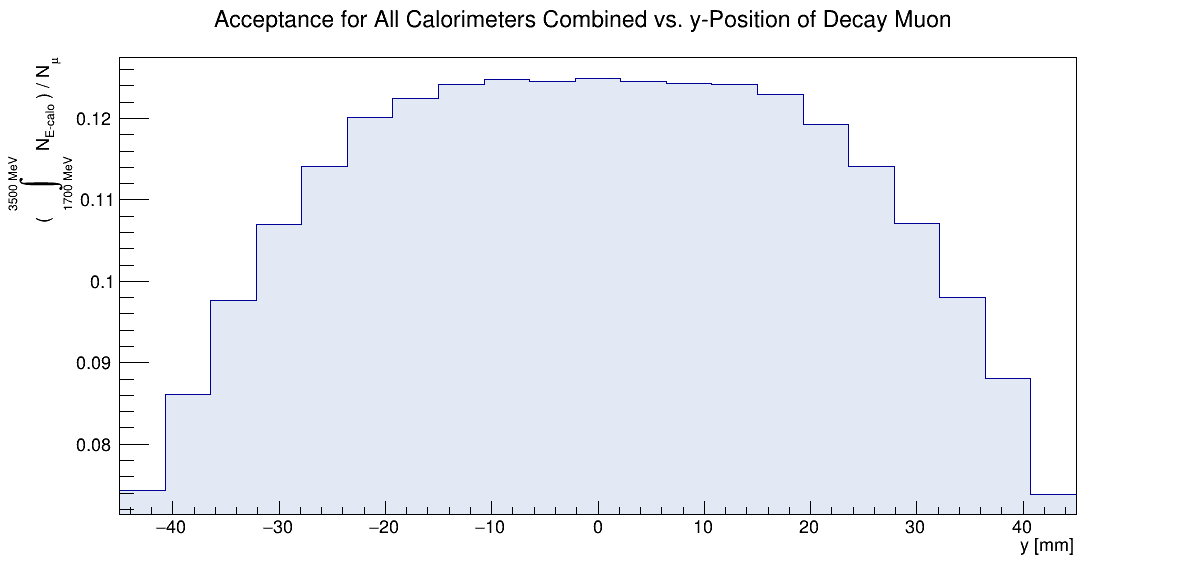

In [13]:
c = r.TCanvas("c","c",1200,600)
he_y_acceptance.Draw()
he_y_acceptance.SetFillColorAlpha(38,0.2)
he_y_acceptance.SetTitle("Acceptance for All Calorimeters Combined vs. y-Position of Decay Muon")
he_y_acceptance.GetYaxis().SetTitle("( #int_{1700 MeV}^{3500 MeV} N_{E-calo} ) / N_{#mu}")
c.Draw()

In [14]:
f3 = r.TF1("f3",
#           "[0]*TMath::Sqrt(TMath::Pi() / 2.0)*[1]*( TMath::Erf(([2] + x - 2*[3])/(TMath::Sqrt(2)*[1])) + TMath::Erf(([2] - x + 2*[3])/(TMath::Sqrt(2)*[1])) )", 
           "[0]/2*( TMath::Erf(([2] + x - 2*[3])/(TMath::Sqrt(2)*[1])) + TMath::Erf(([2] - x + 2*[3])/(TMath::Sqrt(2)*[1])) )", 
           -45, 45)
f3.SetParameters(1,1,1,1)
f3.SetParNames("A","#sigma_{gaus}","r_{square}","#bar{x}")
f3.SetNpx(2000)
f3.SetLineColor(6)

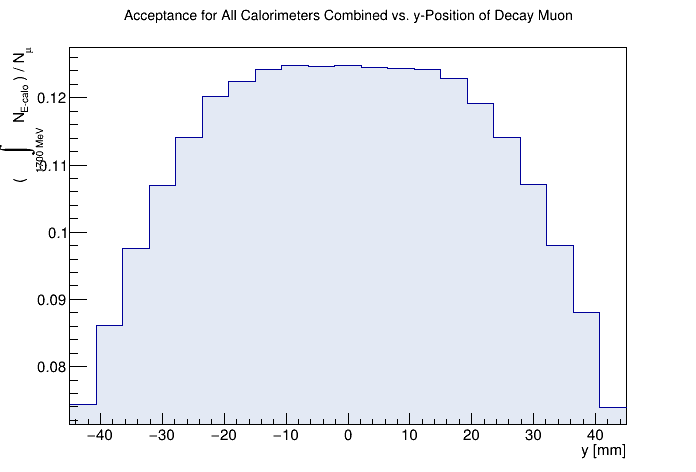

In [15]:
c = r.TCanvas()
he_y_acceptance.Draw()
f3.SetParameters(0.125,5,3,0)
f3.Draw("same")
f3.GetXaxis().SetRangeUser(-45,45)
c.Draw()

<ROOT.TF1 object ("f3") at 0x7fffddc11200>
 FCN=6.34693e-05 FROM MINOS     STATUS=FAILURE       498 CALLS        4477 TOTAL
                     EDM=5.10791e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.25688e-01   1.57954e-01   4.20957e-04  -1.64349e-05
   2  #sigma_{gaus}   1.54331e+01   1.37837e+02   5.20394e-01   4.15716e-09
   3  r_{square}   4.63041e+01   6.77431e+01   9.81540e-02  -5.20923e-09
   4  #bar{x}      4.00607e-02   1.89915e+01   1.89915e+01   1.60702e-06
 FCN=6.34536e-05 FROM MINOS     STATUS=FAILURE       498 CALLS        3782 TOTAL
                     EDM=1.96508e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.25692e-01   1.57905e-01   4.153

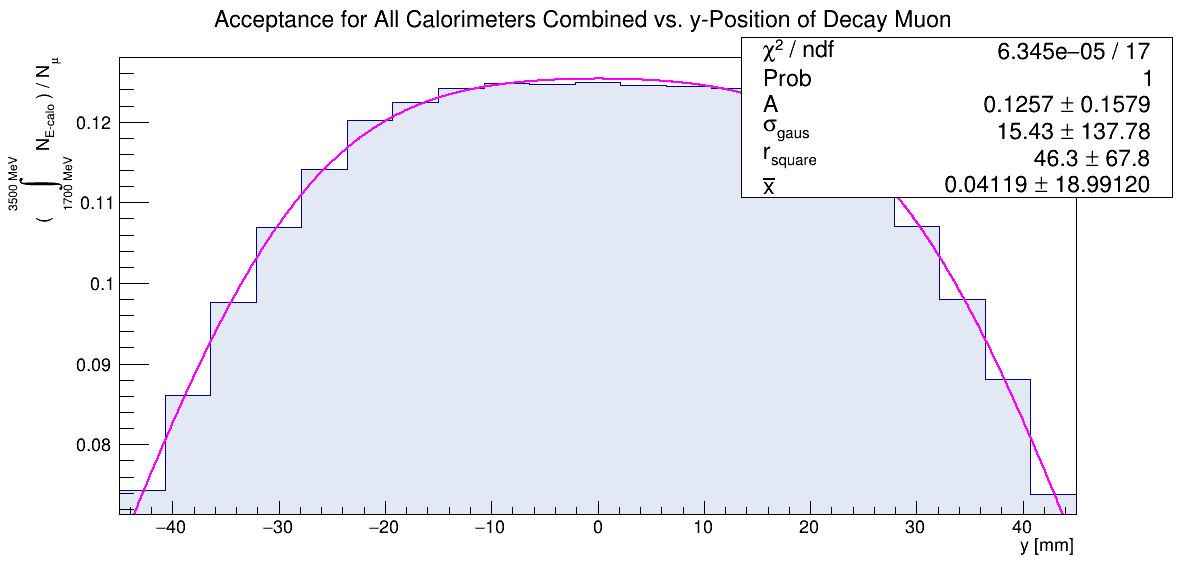

In [16]:
c = r.TCanvas("c","c",1200,600)
he_y_acceptance.Draw()
print(f3)
for i in range(2):
    he_y_acceptance.Fit("f3","REMB")
    #print(f3)
c.Draw()